<a href="https://colab.research.google.com/github/hfzizzulhaq24/Final_Project_Datascience/blob/main/Final_ProjectDS_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this project is to identify and understand customer segments based on their behavior and value, without relying on predefined business labels. By applying an unsupervised clustering approach, these segment profiles are intended to serve as a crucial foundation for designing more targeted and effective business strategies.

# Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.model_selection import validation_curve
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.model_selection import validation_curve

# Read The Data

This data article describes a hotel customer dataset with
31 variables describing a total of 83,590 instances customers. It comprehends three full years of customer behavioral data. In addition to personal and behavioral information, the dataset also contains demographic and geographical information. The data came from a four-star hotel located in Lisbon, Portugal, Europe.

| Variable             | Type        | Description                                                               |
| -------------------- | ----------- | ------------------------------------------------------------------------- |
| ID                   | Numeric     | Customer ID                                                               |
| Nationality          | Categorical | Country of origin (ISO 3155–3:2013 format)                                |
| Age                  | Numeric     | Customer's age (years) at the last day of extraction period               |
| DaysSinceCreation    | Numeric     | Days since the customer record was created                                |
| NameHash             | Categorical | SHA2–256 hash string of customer’s name (used for anonymization)          |
| DocIDHash            | Categorical | SHA2–256 hash string of customer’s ID document (passport, ID card, etc.)  |
| AverageLeadTime      | Numeric     | Avg. number of days between booking date and arrival date                 |
| LodgingRevenue       | Numeric     | Total amount spent on lodging (room, crib, etc.) in Euros                 |
| OtherRevenue         | Numeric     | Total amount spent on other expenses (food, spa, beverage, etc.) in Euros |
| BookingsCanceled     | Numeric     | Number of bookings canceled by the customer                               |
| BookingsNoShowed     | Numeric     | Number of bookings that were no-show                                      |
| BookingsCheckedIn    | Numeric     | Number of bookings resulting in a stay                                    |
| PersonsNights        | Numeric     | Total persons/nights stayed (nights × (adults+children))                  |
| RoomNights           | Numeric     | Total room/nights stayed (rooms × nights)                                 |
| DaysSinceLastStay    | Numeric     | Days since last stay (−1 if never stayed)                                 |
| DaysSinceFirstStay   | Numeric     | Days since first stay (−1 if never stayed)                                |
| DistributionChannel  | Categorical | Channel used for bookings                                                 |
| MarketSegment        | Categorical | Market segment of the customer                                            |
| SRHighFloor          | Boolean     | Request: high floor room (0 = No, 1 = Yes)                                |
| SRLowFloor           | Boolean     | Request: low floor room (0 = No, 1 = Yes)                                 |
| SRAccessibleRoom     | Boolean     | Request: accessible room (0 = No, 1 = Yes)                                |
| SRMediumFloor        | Boolean     | Request: middle floor room (0 = No, 1 = Yes)                              |
| SRBathtub            | Boolean     | Request: bathtub (0 = No, 1 = Yes)                                        |
| SRShower             | Boolean     | Request: shower (0 = No, 1 = Yes)                                         |
| SRCrib               | Boolean     | Request: crib (0 = No, 1 = Yes)                                           |
| SRKingSizeBed        | Boolean     | Request: king-size bed (0 = No, 1 = Yes)                                  |
| SRTwinBed            | Boolean     | Request: twin bed (0 = No, 1 = Yes)                                       |
| SRNearElevator       | Boolean     | Request: near elevator (0 = No, 1 = Yes)                                  |
| SRAwayFromElevator   | Boolean     | Request: away from elevator (0 = No, 1 = Yes)                             |
| SRNoAlcoholInMiniBar | Boolean     | Request: no alcohol in minibar (0 = No, 1 = Yes)                          |
| SRQuietRoom          | Boolean     | Request: quiet room (0 = No, 1 = Yes)                                     |

In [2]:
df = pd.read_excel('/content/HotelCustomersDataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

# Eploratory Data Analysis (EDA)

## Descriptive Data

In [3]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Checking Data Descriptive
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,83590.0,41795.500000,24130.498838,1.0,20898.25,41795.5,62692.750,83590.00
Age,79811.0,45.398028,16.572368,-11.0,34.00,46.0,57.000,122.00
DaysSinceCreation,83590.0,453.640902,313.390291,0.0,177.00,397.0,723.000,1095.00
AverageLeadTime,83590.0,66.196028,87.758990,-1.0,0.00,29.0,103.000,588.00
LodgingRevenue,83590.0,298.802087,372.851892,0.0,59.00,234.0,402.000,21781.00
OtherRevenue,83590.0,67.589132,114.327776,0.0,2.00,38.5,87.675,7730.25
BookingsCanceled,83590.0,0.002022,0.066770,0.0,0.00,0.0,0.000,9.00
BookingsNoShowed,83590.0,0.000634,0.029545,0.0,0.00,0.0,0.000,3.00
BookingsCheckedIn,83590.0,0.794617,0.695778,0.0,1.00,1.0,1.000,66.00
PersonsNights,83590.0,4.649133,4.567673,0.0,1.00,4.0,6.000,116.00


There are some outliers in the PersonsNight and RoomNight columns, like bookings with around 100 people and a large number of rooms.

There are also some weird values in the customer age column — like negative ages that don’t make sense for humans, including one with age -11.

In [5]:
df_stay = (
    df.groupby([
        'DaysSinceCreation',
        'BookingsCanceled',
        'BookingsNoShowed',
        'BookingsCheckedIn',
        'PersonsNights',
        'RoomNights',
        'DaysSinceLastStay',
        'DaysSinceFirstStay',
        'DistributionChannel'
    ])["ID"]
    .unique()
    .reset_index()
)

In [6]:
# Checking customers who made hotel bookings in large quantities
df_stay[df_stay['PersonsNights'] > 50].sort_values(by="PersonsNights", ascending=False)

,DaysSinceCreation,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,ID
18032,857,0,2,40,116,116,328,860,Corporate,[12953]
2515,111,1,0,34,78,38,77,1116,Direct,[71772]
21442,1033,3,1,66,75,95,383,1034,Corporate,[2161]
18544,879,9,0,57,73,66,27,1075,Direct,[11481]
14965,688,0,0,1,68,17,705,705,Travel Agent/Operator,[22196]
15875,743,0,0,1,68,34,777,777,Corporate,[20032]
21280,1025,1,0,29,62,185,777,1036,Corporate,[2758]
3181,137,0,0,1,59,59,196,196,Corporate,[67985]
18194,864,0,0,1,56,14,878,878,Travel Agent/Operator,[12490]
12939,585,0,0,13,52,40,399,588,Corporate,[28986]


It looks like these outliers are actually normal, since the large room bookings are from office workers who were probably going on vacation, and almost all of them are company employee trips.

In [7]:
df_stay[df_stay['RoomNights'] > 50].sort_values(by='RoomNights', ascending=False)

,DaysSinceCreation,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,ID
21280,1025,1,0,29,62,185,777,1036,Corporate,[2758]
18032,857,0,2,40,116,116,328,860,Corporate,[12953]
21442,1033,3,1,66,75,95,383,1034,Corporate,[2161]
20805,998,0,0,2,2,88,990,1084,Travel Agent/Operator,[4197]
18544,879,9,0,57,73,66,27,1075,Direct,[11481]
3181,137,0,0,1,59,59,196,196,Corporate,[67985]
11203,507,1,2,19,51,51,327,510,Corporate,[34237]


For customers who booked a room for around 185 nights, they were office workers, and it’s assumed they rented the rooms for work purposes while staying in Lisbon for a few months.

In [8]:
df_stay[df_stay['DaysSinceLastStay'] == 0 ]

,DaysSinceCreation,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,ID
98,3,0,0,2,9,3,0,4,Travel Agent/Operator,[83122]


### Customer Age Anomali

There are customer ages with negative values, and we will check whether these are unreasonable values for further analysis to determine whether the data should be discarded or manipulated.

In [9]:
df_age = (
    df.groupby([
        'Age',
        'DaysSinceCreation',
        'PersonsNights',
        'RoomNights',
        'DaysSinceLastStay',
        'DaysSinceFirstStay',
        'DistributionChannel'
    ])["ID"]
    .unique()
    .reset_index()
)

In [10]:
# Checking Age with Minus Value
df_age[df_age['Age'] < 0 ]

,Age,DaysSinceCreation,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,ID
0,-11.0,827,3,3,830,830,Travel Agent/Operator,[15105]
1,-11.0,953,1,1,954,954,Travel Agent/Operator,[6752]
2,-10.0,837,2,2,839,839,Travel Agent/Operator,[14322]
3,-10.0,891,2,2,893,893,Travel Agent/Operator,[10695]
4,-10.0,891,4,2,893,893,Travel Agent/Operator,[10663]
5,-10.0,923,4,4,927,927,Travel Agent/Operator,[8629]
6,-9.0,732,9,3,735,735,Travel Agent/Operator,[20406]
7,-9.0,981,2,1,982,982,Travel Agent/Operator,[5129]
8,-7.0,927,4,2,929,929,Travel Agent/Operator,[8361]
9,-7.0,1029,0,0,-1,-1,Travel Agent/Operator,[2470]


From the data, we can see that customers with anomalous (negative) ages mostly still checked in, and they also made their bookings through travel agents/operators. This suggests that they probably just filled in the age field as a formality during the room booking process.

In [11]:
# Checking Customer Age more than 100th
df_age[df_age['Age'] > 100 ]

,Age,DaysSinceCreation,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,ID
68837,109.0,166,0,0,-1,-1,Travel Agent/Operator,[64240]
68838,110.0,768,2,2,770,770,Corporate,[18911]
68839,113.0,213,0,0,-1,-1,Travel Agent/Operator,[58037]
68840,113.0,337,4,2,339,339,Travel Agent/Operator,[44519]
68841,113.0,634,4,4,638,638,Direct,[25588]
68842,114.0,330,2,2,332,332,Travel Agent/Operator,[45083]
68843,114.0,1015,2,1,1016,1016,Travel Agent/Operator,[3283]
68844,122.0,253,0,0,-1,-1,Travel Agent/Operator,[53285]


In [12]:
df_age[(df_age['Age'] >= 0) & (df_age['Age'] <= 16) & (df_age['DaysSinceLastStay'] == -1)].sort_values(by='Age', ascending=True)

,Age,DaysSinceCreation,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,ID
49,0.0,151,0,0,-1,-1,Direct,[66318]
50,0.0,172,0,0,-1,-1,Direct,[63542]
51,0.0,172,0,0,-1,-1,Travel Agent/Operator,[63437]
52,0.0,177,0,0,-1,-1,Direct,[62765]
38,0.0,95,0,0,-1,-1,Direct,[73884]
...,...,...,...,...,...,...,...,...
3174,16.0,354,0,0,-1,-1,Direct,[43472]
3173,16.0,353,0,0,-1,-1,Travel Agent/Operator,[43561]
3172,16.0,337,0,0,-1,-1,Travel Agent/Operator,[44484]
3283,16.0,1069,0,0,-1,-1,Direct,[747]


For customers aged 0 to 16 years, most of them booked hotels through Travel Agents, and it can be assumed that the age input was just a formality in the booking process.

In [13]:
print(df['DistributionChannel'].value_counts())

DistributionChannel
Travel Agent/Operator      68569
Direct                     11912
Corporate                   2600
Electronic Distribution      509
Name: count, dtype: int64


In [14]:
print(df['MarketSegment'].value_counts())

MarketSegment
Other                    48039
Travel Agent/Operator    11670
Direct                   11457
Groups                    9501
Corporate                 2169
Complementary              510
Aviation                   244
Name: count, dtype: int64


## Distribution Checking

### Age Customer

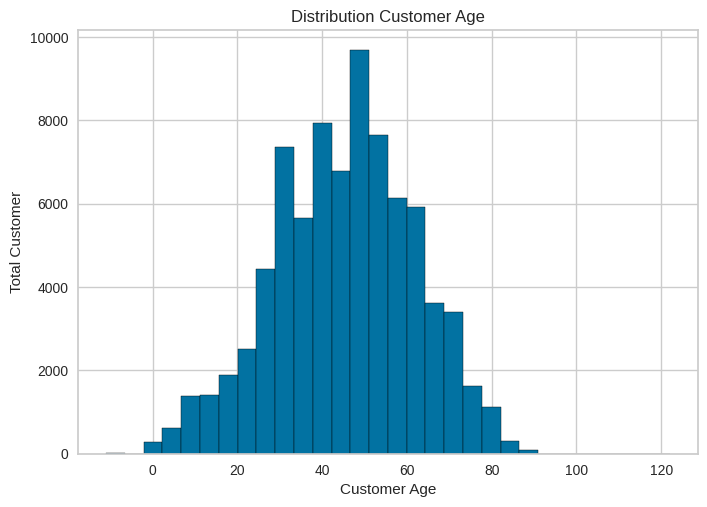

In [15]:
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Distribution Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Total Customer')
plt.show()

The average age of customers is between 25 and 65 years old.

### Days Since Creation

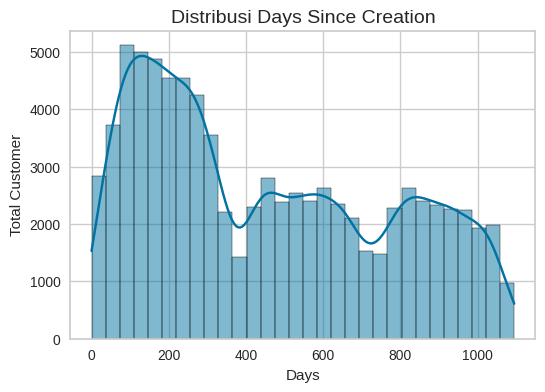

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df["DaysSinceCreation"], bins=30, kde=True)
plt.title("Distribusi Days Since Creation", fontsize=14)
plt.xlabel("Days")
plt.ylabel("Total Customer")
plt.show()

The distribution of DaysSinceCreation shows that most customers (the first peak) have relatively new records, less than 200 days (around 6 months). There’s also another group of customers with older records, around 400–1000 days. This suggests that your customer database has two main waves of acquisition: a newer wave and an older one

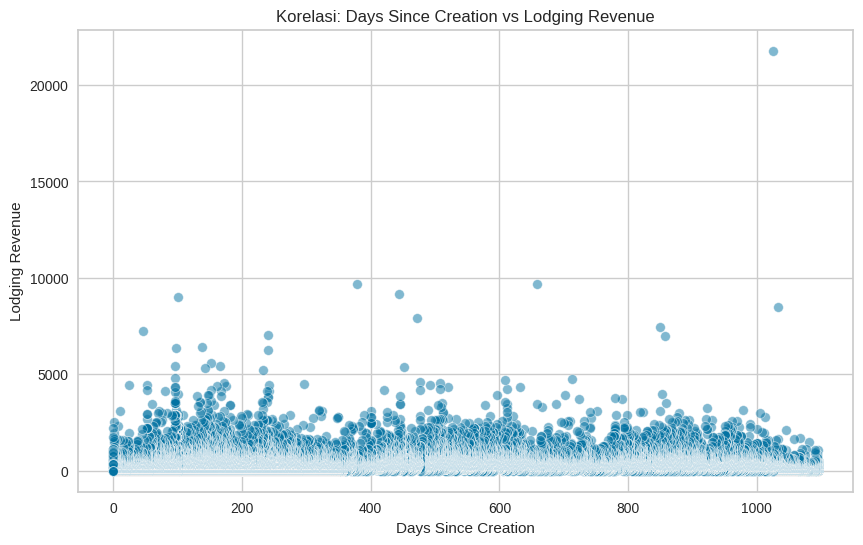

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DaysSinceCreation', y='LodgingRevenue', data=df, alpha=0.5)
plt.title('Korelasi: Days Since Creation vs Lodging Revenue')
plt.xlabel('Days Since Creation')
plt.ylabel('Lodging Revenue')
plt.grid(True)
plt.show()

High-income points (for example, above $5000) show up both at lower DaysSinceCreation (around 250) and higher ones (around 1000). Most of the data points, though, are clustered at the lower end, where income is low regardless of customer age.

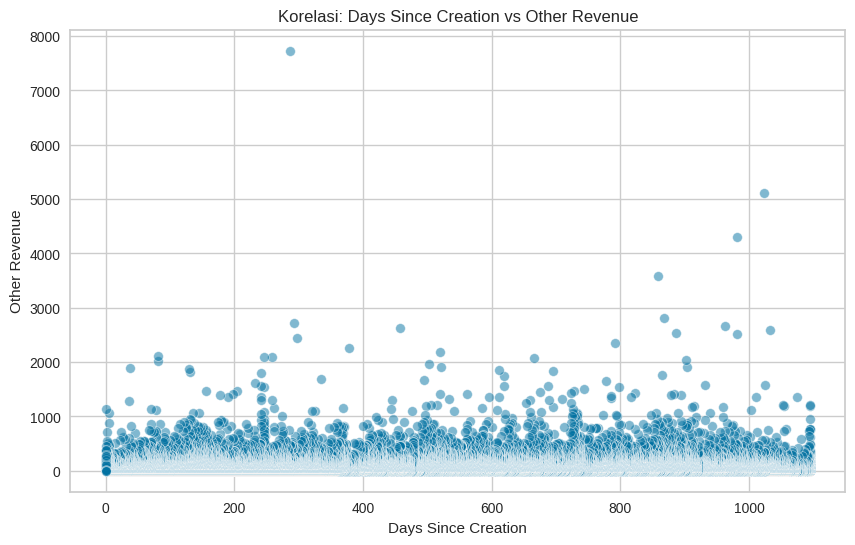

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DaysSinceCreation', y='OtherRevenue', data=df, alpha=0.5)
plt.title('Korelasi: Days Since Creation vs Other Revenue')
plt.xlabel('Days Since Creation')
plt.ylabel('Other Revenue')
plt.grid(True)
plt.show()

Customers with very high lodging revenue (above $15,000) are also spread across different database ages, not just among long-term customers.

### Distributin Booking Before Arrival

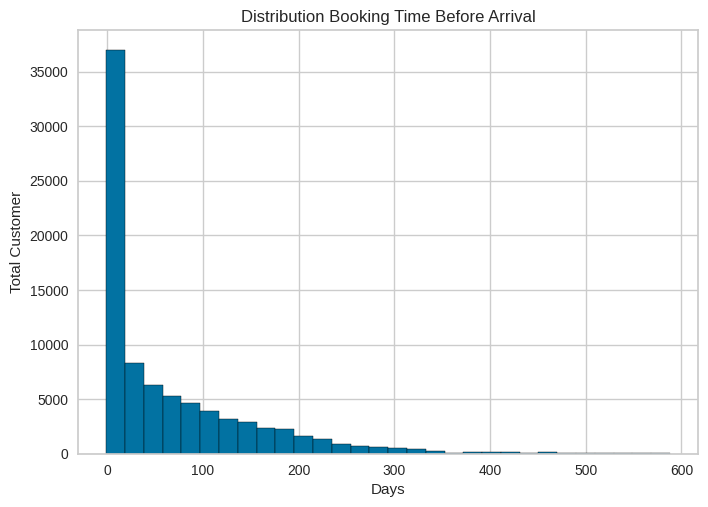

In [19]:
plt.hist(df['AverageLeadTime'], bins=30, edgecolor='black')
plt.title('Distribution Booking Time Before Arrival')
plt.xlabel('Days')
plt.ylabel('Total Customer')
plt.show()

In [20]:
df[df['AverageLeadTime'] > 200]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
5356,5357,NLD,53.0,977,0x56FEB595657D6A741F56EA05A8D52A744D95FC2161F9...,0x494ACD804F87C3B89FABE8B0C8AFD8CB837ED075E1CA...,209,209.31,61.5,0,...,0,0,0,0,1,0,0,0,0,0
5357,5358,NLD,57.0,977,0xDD110DEB118BA6EF6B528586EE9305F7C961AB9792B8...,0x1E760881CF3948B1A1ECBC0AF789A0708CB212EE6A5B...,209,209.31,60.0,0,...,0,0,0,0,1,0,0,0,0,0
5383,5384,FRA,45.0,977,0x13F9076CA63A5BB8D8272B9C76CEF8000B9002E211D0...,0xDDFA2C02A96F2367E7B01F462D262FEE77F6A1BDC6D6...,208,375.00,85.0,0,...,0,0,0,0,0,0,0,0,0,0
5429,5430,GBR,66.0,976,0xA5899E6CEDA82478A1F16CE0F23146FE782D9123F88A...,0x2DBA9512979BA10252CCD2B8F851A66EC19BDA2C4F37...,216,315.00,199.5,0,...,0,0,0,0,0,0,0,0,0,0
5652,5653,FRA,54.0,972,0xAAD5F7C6A5B89D793BDC72B0666F516F9719580A59FD...,0x6C5F1161DB4C580BB2DA5FDE2EBF349933B04010C9F9...,222,530.00,128.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83463,83464,FRA,48.0,1,0xE7D77DBE5E8D76507DE8519C28EA9CE8241CFADF9E0E...,0x9EE791F9CEC44C073A8038E5D8670232C4E957D5755D...,320,394.45,56.0,0,...,0,0,0,0,0,1,0,0,0,0
83471,83472,USA,61.0,1,0x2B21B239A5576F31A5B815AC5BDF00E87EE2C3B43F33...,0x731D97108C9129AAB2D86ADAF216FC93C27E3DA05F26...,229,1531.30,1139.5,0,...,0,0,0,0,1,0,0,0,0,0
83556,83557,DEU,47.0,0,0x2CA7136EABCC38FBE68E76B9D8EC465980428438777F...,0x31E36B7F92E8920F057459076A4AA63FBF09BEDB9920...,249,406.30,231.0,0,...,0,0,0,0,0,0,0,0,0,0
83560,83561,DEU,48.0,0,0x08BAB47A6B4CC82200415CDADE2D6C3E6DAF6B264067...,0x60059B7E773A2EE2B45705595A011F0FB0C9516E8168...,249,406.30,288.0,0,...,0,0,0,0,0,0,0,0,0,1


On average, bookings are made about 2–3 months before check-in, and only around 7,012 customers booked more than 5 months in advance.

### Revenue Hotel

In [21]:
df_revenue = (
    df.groupby([
        'DaysSinceCreation',
        'BookingsCheckedIn',
        'PersonsNights',
        'RoomNights',
        'LodgingRevenue',
        'OtherRevenue',
        'DistributionChannel'
    ])["ID"]
    .unique()
    .reset_index()
)

#### Lodging Revenue

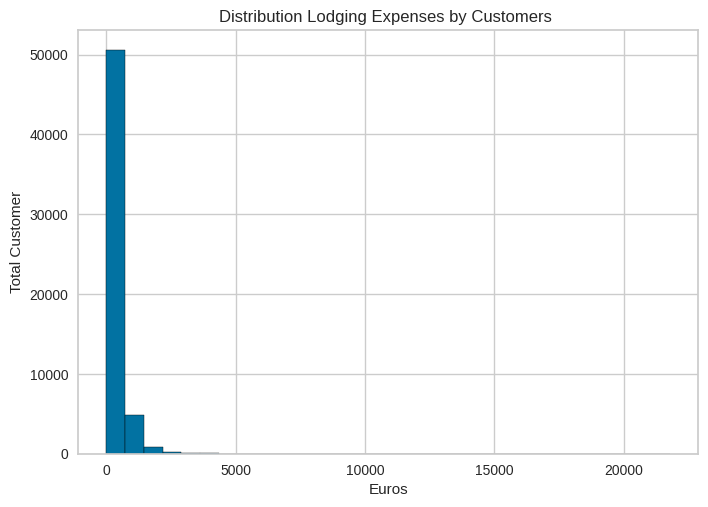

In [22]:
plt.hist(df_revenue['LodgingRevenue'], bins=30, edgecolor='black')
plt.title('Distribution Lodging Expenses by Customers ')
plt.xlabel('Euros')
plt.ylabel('Total Customer')
plt.show()

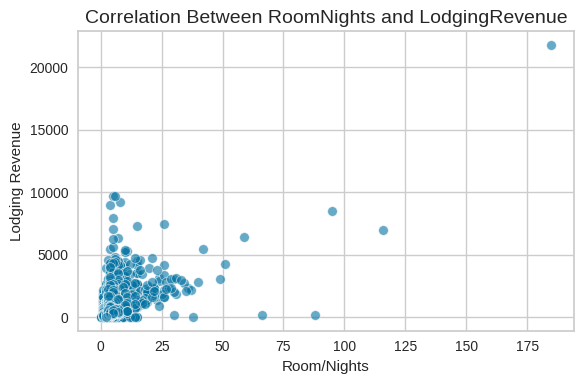

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_revenue, x="RoomNights", y="LodgingRevenue", alpha=0.6)

plt.title("Correlation Between RoomNights and LodgingRevenue", fontsize=14)
plt.xlabel("Room/Nights")
plt.ylabel("Lodging Revenue")
plt.tight_layout()
plt.show()

In [24]:
df_revenue[df_revenue['LodgingRevenue'] > 3000].sort_values(by='BookingsCheckedIn', ascending=False)

,DaysSinceCreation,BookingsCheckedIn,PersonsNights,RoomNights,LodgingRevenue,OtherRevenue,DistributionChannel,ID
55378,1033,66,75,95,8493.65,2587.5,Corporate,[2161]
46060,857,40,116,116,6991.00,957.0,Corporate,[12953]
55001,1025,29,62,185,21781.00,1584.0,Corporate,[2758]
39826,741,24,49,49,3023.00,418.0,Corporate,[20073]
27288,507,19,51,51,4255.00,685.0,Corporate,[34237]
...,...,...,...,...,...,...,...,...
41543,780,1,23,23,3772.00,181.0,Corporate,[18160]
39127,724,1,33,11,3717.00,1255.5,Direct,[20865]
45804,853,1,12,4,4004.00,577.5,Travel Agent/Operator,[13268]
46187,859,1,14,7,3507.00,513.0,Travel Agent/Operator,[12886]


Customers who spent more than €3000 are mostly long-term customers. Even though it’s just a small portion, we can see that a large number of them come from corporate customers, which suggests they were likely traveling together or on group trips.

#### Other Revenue

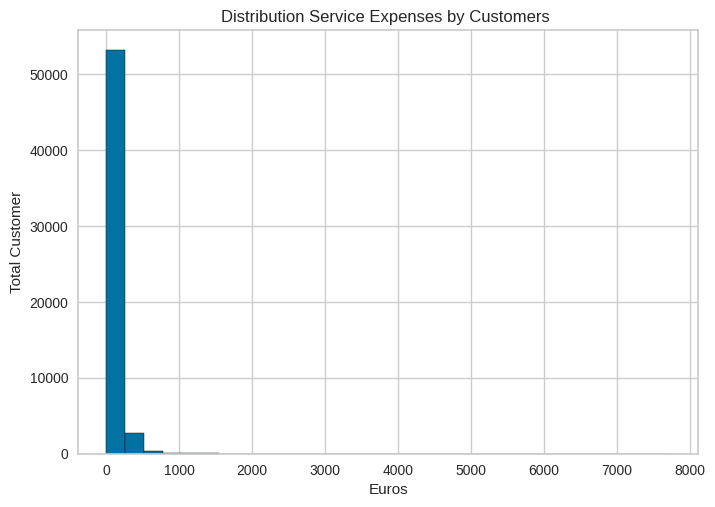

In [25]:
plt.hist(df_revenue['OtherRevenue'], bins=30, edgecolor='black')
plt.title('Distribution Service Expenses by Customers ')
plt.xlabel('Euros')
plt.ylabel('Total Customer')
plt.show()

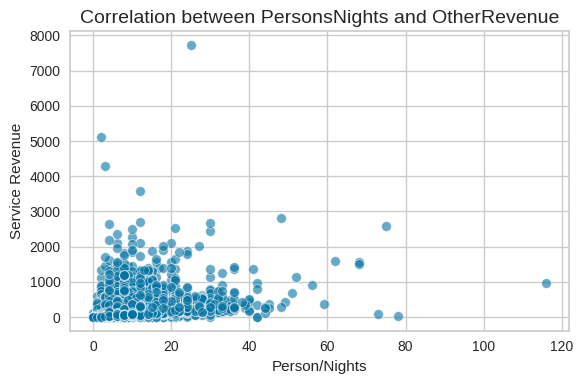

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_revenue, x="PersonsNights", y="OtherRevenue", alpha=0.6)

plt.title("Correlation between PersonsNights and OtherRevenue", fontsize=14)
plt.xlabel("Person/Nights")
plt.ylabel("Service Revenue")
plt.tight_layout()
plt.show()

In [27]:
df_revenue[df_revenue['OtherRevenue'] > 2000].sort_values(by='BookingsCheckedIn', ascending=False)

,DaysSinceCreation,BookingsCheckedIn,PersonsNights,RoomNights,LodgingRevenue,OtherRevenue,DistributionChannel,ID
55378,1033,66,75,95,8493.65,2587.50,Corporate,[2161]
16576,292,10,12,8,1719.00,2712.50,Corporate,[48691]
16285,287,9,25,13,1458.50,7730.25,Travel Agent/Operator,[49171]
54942,1024,3,2,12,0.00,5105.50,Travel Agent/Operator,[2844]
3977,81,1,20,5,787.80,2116.50,Travel Agent/Operator,[75916]
14643,258,1,12,4,1674.00,2094.50,Travel Agent/Operator,[52703]
13898,246,1,6,3,354.00,2094.00,Travel Agent/Operator,[54190]
3979,81,1,27,9,4135.05,2012.40,Direct,[75770]
16869,297,1,30,15,4521.75,2440.50,Travel Agent/Operator,[48128]
27940,519,1,4,2,300.00,2190.40,Travel Agent/Operator,[33558]


Customers who spent more than €2000 are mostly long term customers, but they only make up a small share of the hotel’s total transactions.

#### Booking Metrics

In [28]:
print(df['BookingsCanceled'].value_counts())

BookingsCanceled
0    83472
1       92
2       12
3        8
4        5
9        1
Name: count, dtype: int64


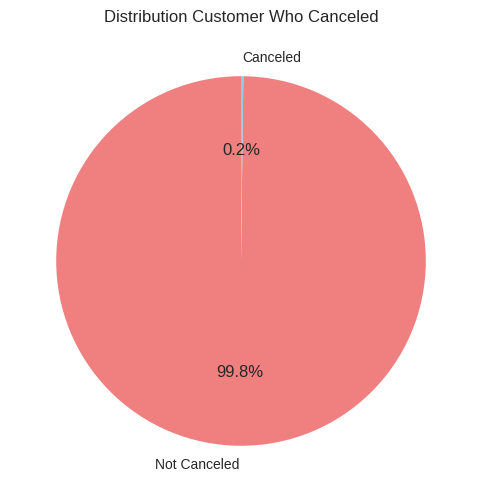

In [29]:
total_canceled = df['BookingsCanceled'].sum()
total_not_canceled = len(df) - total_canceled

labels = ['Not Canceled', 'Canceled']
sizes = [total_not_canceled, total_canceled]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribution Customer Who Canceled')
plt.show()

In [30]:
print(df['BookingsNoShowed'].value_counts())

BookingsNoShowed
0    83546
1       36
2        7
3        1
Name: count, dtype: int64


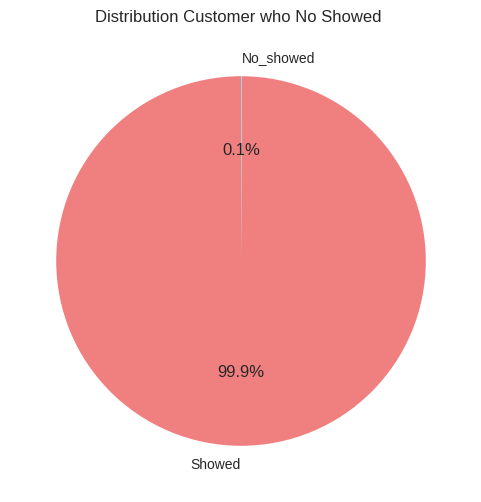

In [31]:
total_noshowed = df['BookingsNoShowed'].sum()
total_showed = len(df) - total_noshowed

labels = ['Showed', 'No_showed']
sizes = [total_showed, total_noshowed]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribution Customer who No Showed ')
plt.show()

In [32]:
print(df['BookingsCheckedIn'].value_counts())

BookingsCheckedIn
1     62215
0     19920
2      1147
3       132
4        59
6        20
5        20
7        16
8        10
9         9
10        7
11        6
12        4
13        4
29        3
15        3
23        2
14        2
66        1
17        1
25        1
26        1
57        1
40        1
18        1
24        1
19        1
20        1
34        1
Name: count, dtype: int64


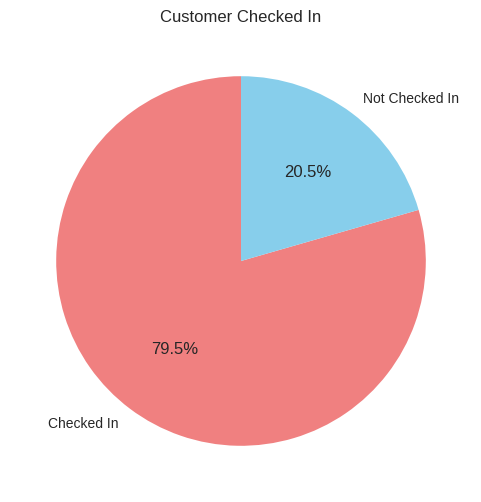

In [33]:
total_checkedin = df['BookingsCheckedIn'].sum()
total_not_checkedin = len(df) - total_checkedin

labels = ['Checked In', "Not Checked In"]
sizes = [total_checkedin, total_not_checkedin]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Customer Checked In')
plt.show()

Looking at the comparison, about 79.5% of customers actually checked in, which is already a pretty good number. However, around 20.5% didn’t check in. The assumption is that hotel management could work on minimizing this number to boost customer profitability.

### Customer Stay History

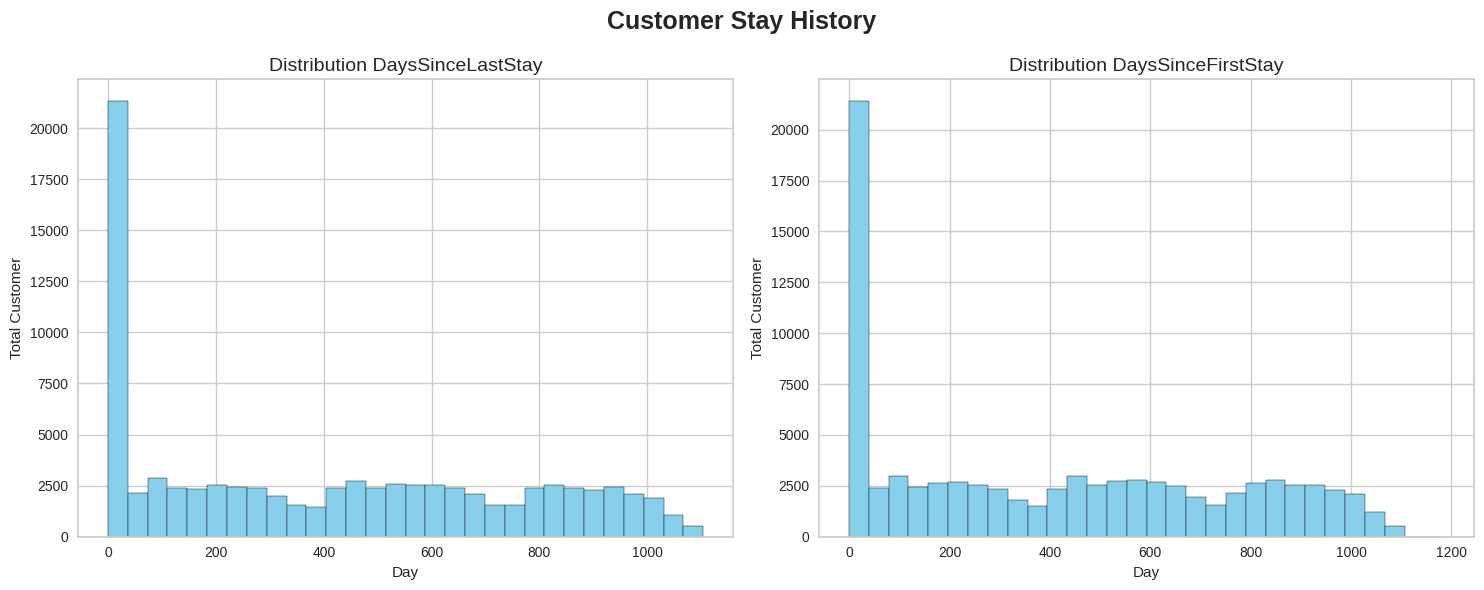

In [34]:
hist_stay = ['DaysSinceLastStay','DaysSinceFirstStay']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for ax, col in zip(axes, hist_stay):
    ax.hist(df[col], bins=30, edgecolor='black', color='skyblue')
    ax.set_title(f'Distribution {col}', fontsize=14)
    ax.set_xlabel('Day')
    ax.set_ylabel('Total Customer')

plt.suptitle('Customer Stay History', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

The majority of active customers over 20,000 are recorded at Day 0, indicating most have just stayed recently and remain highly engaged.

The dormant customer segment is spread fairly evenly beyond 1,000 days, showing a group of customers who haven’t returned in a long time and may need reactivation strategies.

### Distribusi Customer Request Room

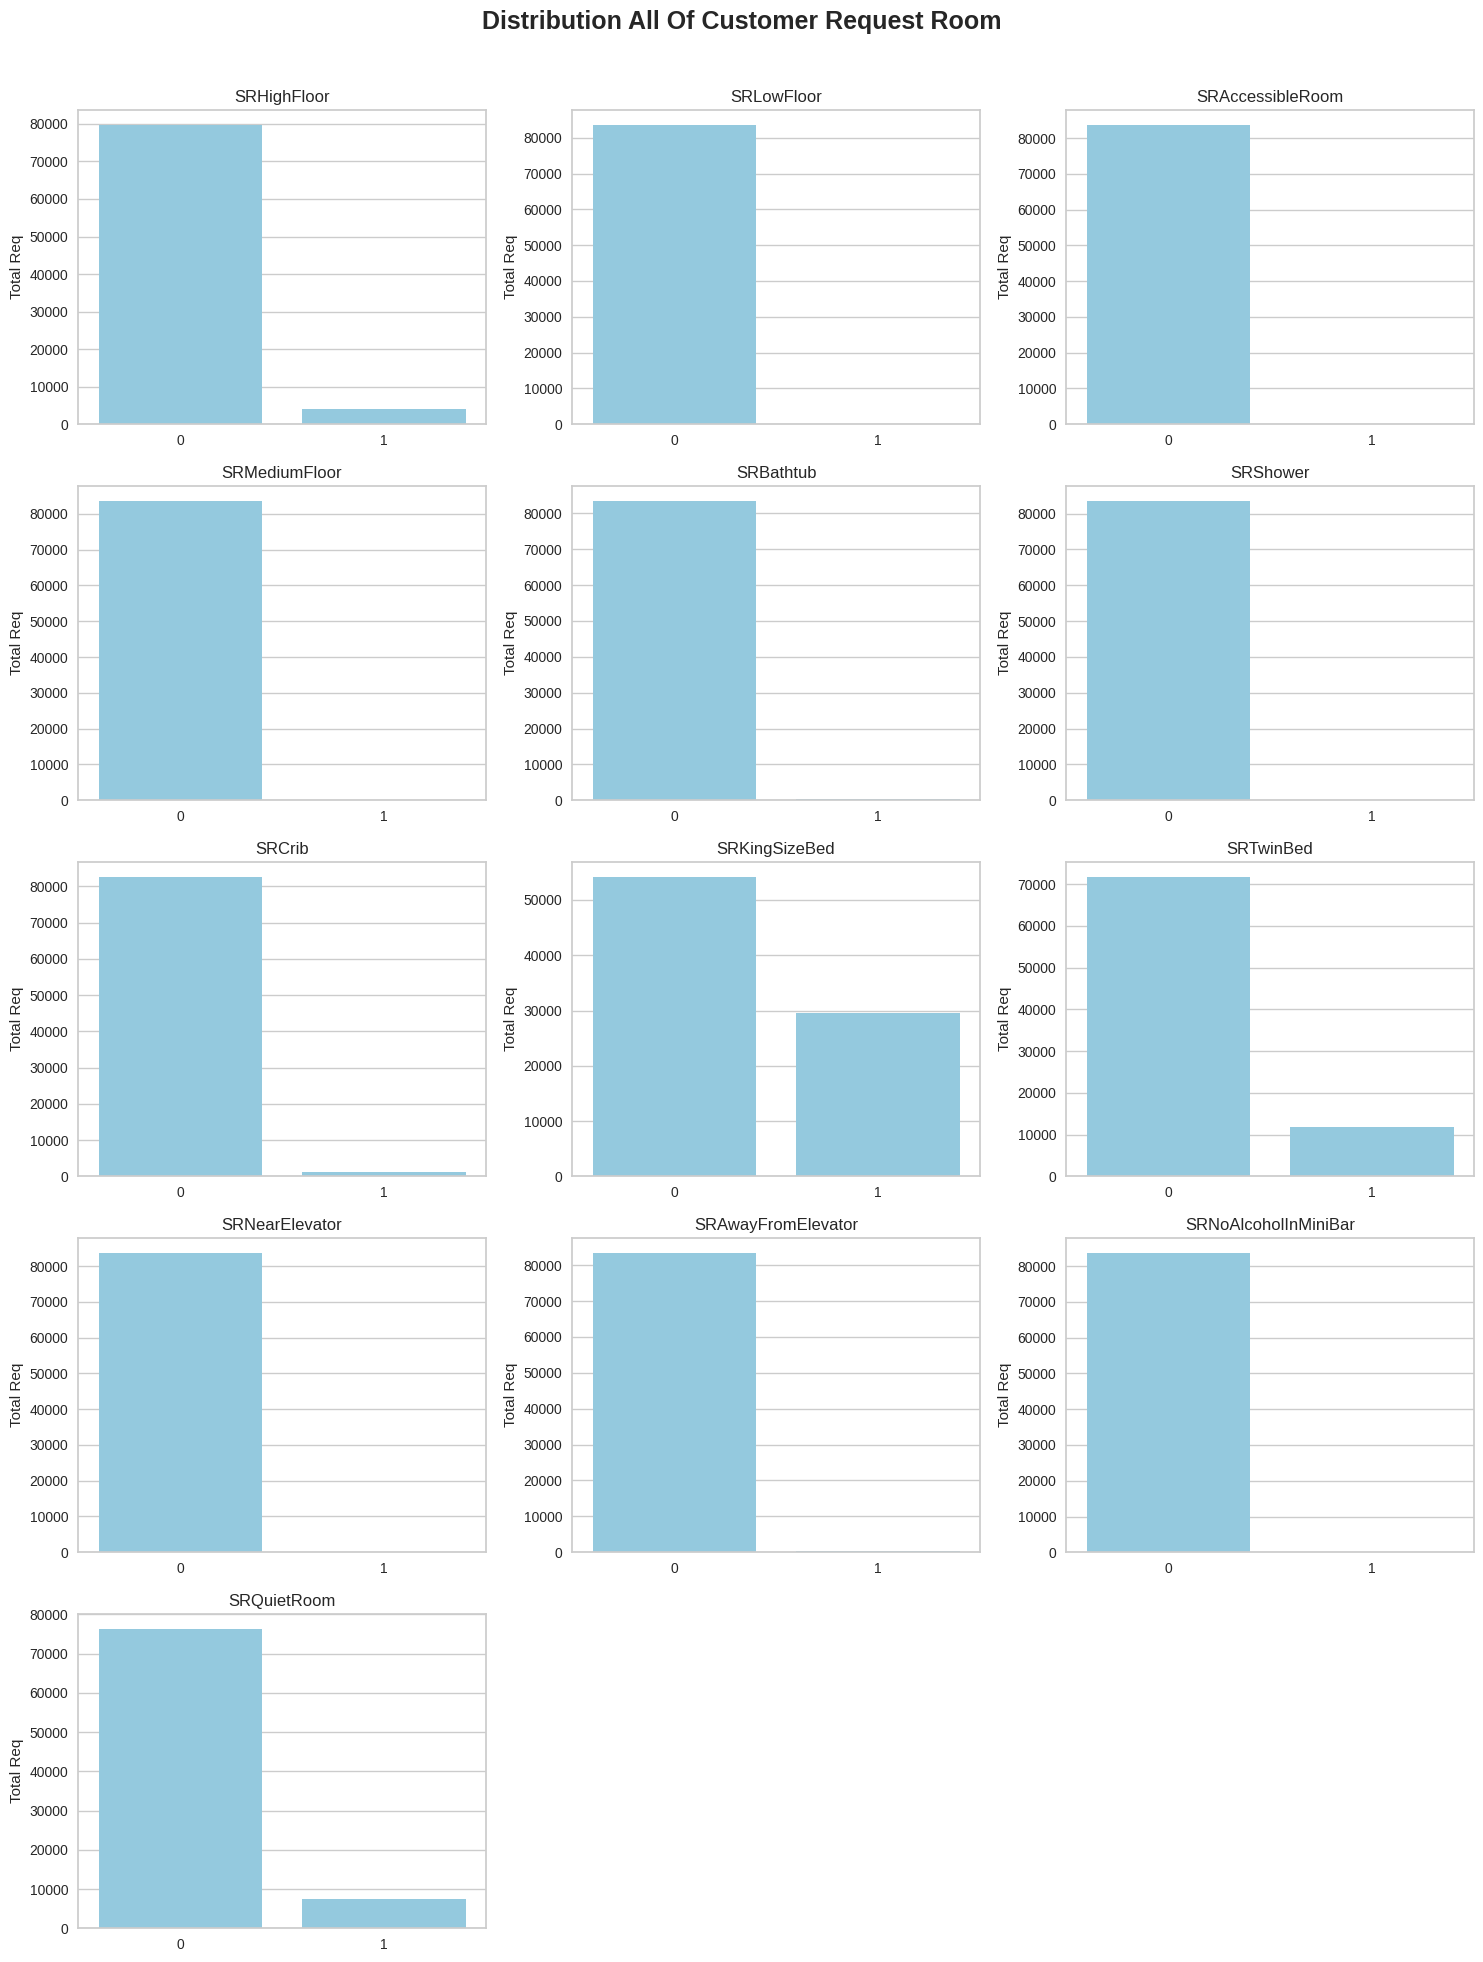

In [36]:
req_serv_cols = [
    'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
    'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
    'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
    'SRNoAlcoholInMiniBar', 'SRQuietRoom'
]
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(req_serv_cols):
    sns.countplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Total Req')

for j in range(len(req_serv_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution All Of Customer Request Room', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [37]:
high_floor = df[df['SRHighFloor'] ==  1]
print(f'Total Request : {len(high_floor)}')

Total Request : 3969


In [38]:
king_bed = df[df['SRKingSizeBed'] ==  1]
print(f'Total Request : {len(king_bed)}')

Total Request : 29481


In [39]:
crib = df[df['SRCrib'] ==  1]
print(f'Total Request : {len(crib)}')

Total Request : 1105


In [40]:
twin_bed = df[df['SRTwinBed'] ==  1]
print(f'Total Request : {len(twin_bed)}')

Total Request : 11915


In [41]:
quiet_room = df[df['SRQuietRoom'] ==  1]
print(f'Total Request : {len(quiet_room)}')

Total Request : 7387


In [42]:
high_floor = len(df[df['SRHighFloor'] == 1])
king_bed = len(df[df['SRKingSizeBed'] == 1])
crib = len(df[df['SRCrib'] == 1])
twin_bed = len(df[df['SRTwinBed'] == 1])
quiet_room = len(df[df['SRQuietRoom'] == 1])

total_req = high_floor + king_bed + crib + twin_bed + quiet_room
percent = (total_req / len(df)) * 100

print(f"Total Request: {total_req}")
print(f"Persentase: {percent:.2f}%")

Total Request: 53857
Persentase: 64.43%


It can be seen that most room requests from customers are for SR King Size Bed or rooms with Twin Beds. Other than that, most bookings are made without any special requests. In total, specific room requests make up about 64.4% of all hotel bookings.

# Data Preprocessing

In [ ]:
df_drop = ['ID','Nationality', 'NameHash', 'DocIDHash', 'MarketSegment']
df_cleaned = df.drop(columns=df_drop)

In [ ]:
df_cleaned.sample(3)

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
79502,37.0,50,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
30316,33.0,566,23,218.0,22.0,0,0,1,4,2,...,0,0,0,0,1,0,0,0,0,0
22038,45.0,693,0,270.8,91.7,0,0,1,4,2,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Missing Values
df_cleaned.isnull().sum()

,0
Age,3779
DaysSinceCreation,0
AverageLeadTime,0
LodgingRevenue,0
OtherRevenue,0
BookingsCanceled,0
BookingsNoShowed,0
BookingsCheckedIn,0
PersonsNights,0
RoomNights,0


In [ ]:
# Mengisi nilai
# Hitung median hanya dari nilai valid (>16 dan bukan NaN)
median_age = df_cleaned.loc[df_cleaned["Age"] > 16, "Age"].mean()
print("\nMedian Age valid:", median_age)

# Ganti nilai yang <=16 atau NaN dengan median
df_cleaned.loc[(df_cleaned["Age"].isna()) | (df_cleaned["Age"] <= 16), "Age"] = median_age

print("\nData setelah dibersihkan")


Median Age valid: 47.30136913956774

Data setelah dibersihkan


In [ ]:
#Check Nilai Duplikat
df_cleaned.duplicated().sum()

np.int64(5794)

In [ ]:
df_cleaned = df_cleaned.drop_duplicates()

In [ ]:
# Kolom Customer yang terakhir menginap
df_cleaned[df_cleaned['DaysSinceLastStay'] == -1]

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2,31.000000,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51.000000,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,49.000000,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,42.000000,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,27.000000,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83573,36.000000,0,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83579,36.000000,0,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83581,48.000000,0,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83587,53.000000,0,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


There are 15,577 customers who never stayed at the hotel. For the -1 values, I’ll replace them with 0.

In [ ]:
# Mengisi nilai 0 untuk menggantikan nilai -1 sebagai tanda customer tidak pernah menginap di hotel
df_cleaned['DaysSinceLastStay'] = df_cleaned['DaysSinceLastStay'].replace(-1, 0)
df_cleaned['DaysSinceFirstStay'] = df_cleaned['DaysSinceFirstStay'].replace(-1, 0)

In [ ]:
req_room_cols = [ 'SRHighFloor','SRLowFloor', 'SRAccessibleRoom',
                 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
                  'SRKingSizeBed','SRTwinBed', 'SRNearElevator',
                  'SRAwayFromElevator','SRNoAlcoholInMiniBar', 'SRQuietRoom']

# Buat kolom baru 'req_room'
df_cleaned['req_room'] = df_cleaned[req_room_cols].max(axis=1)

In [ ]:
df_cleaned[df_cleaned['LodgingRevenue'] == 0]

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,req_room
2,31.000000,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51.000000,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,49.000000,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,42.000000,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10,27.000000,1095,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83573,36.000000,0,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83579,36.000000,0,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83581,48.000000,0,0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83587,53.000000,0,0,0.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


There are 16,055 customer records where no check-in or booking was made, so this data will be dropped since it’s not useful for clustering.

In [ ]:
df_cleaned = df_cleaned[df_cleaned['LodgingRevenue'] != 0].copy()

# Cek jumlah data setelah di-drop
print(df_cleaned.shape)

(61741, 27)


In [ ]:
df_ = (
    df.groupby([
        'Age',
        'DaysSinceCreation',
        'PersonsNights',
        'RoomNights',
        'DaysSinceLastStay',
        'DaysSinceFirstStay',
        'DistributionChannel'
    ])["ID"]
    .unique()
    .reset_index()
)

In [ ]:
df_cleaned[df_cleaned['DaysSinceLastStay'] == 0]

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,req_room
83121,42.0,3,5,222.0,68.0,0,0,2,9,3,...,0,0,0,1,0,0,0,0,0,1


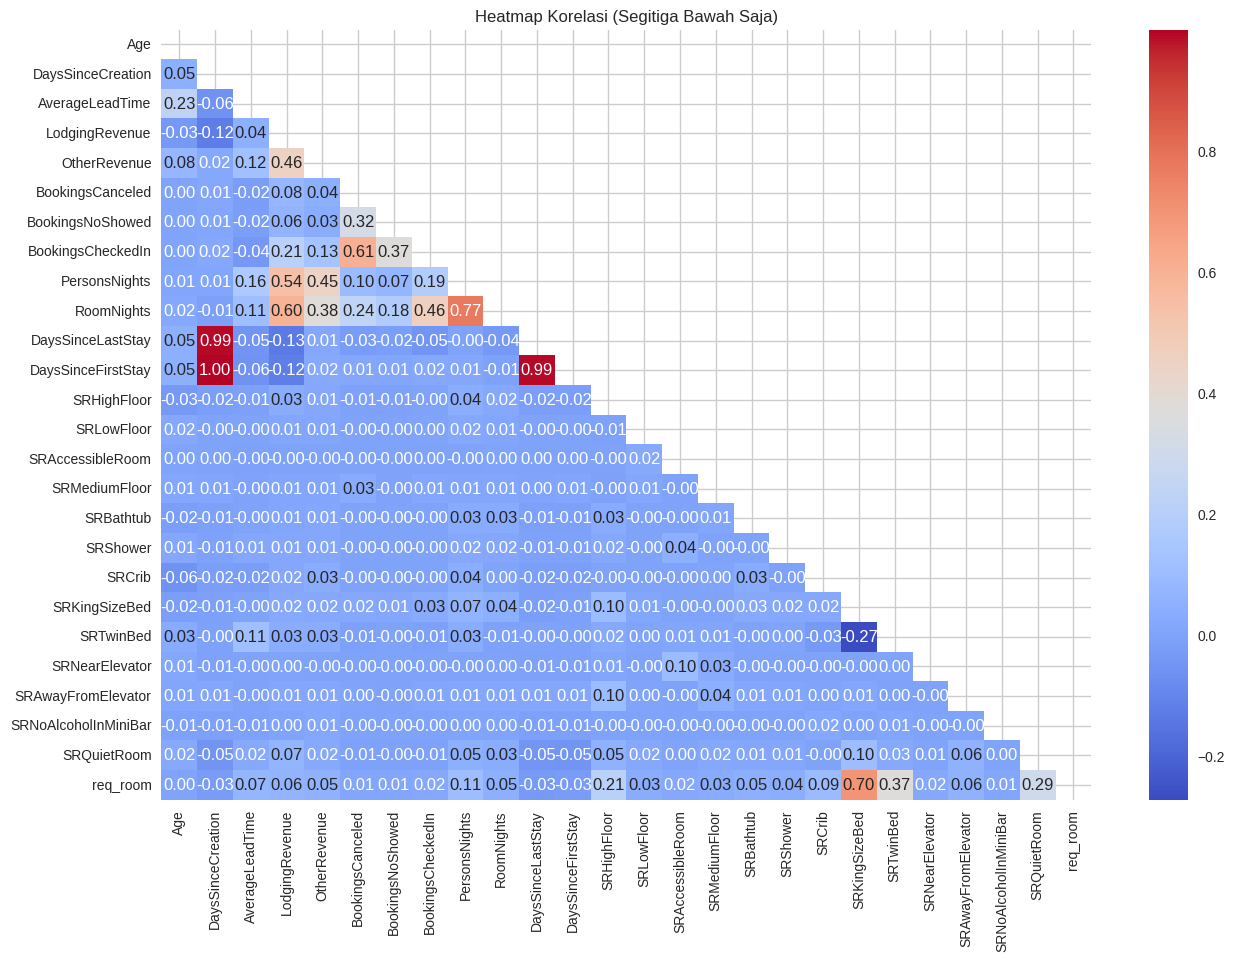

In [ ]:
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64'])
corr = numeric_cols.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize=(15,10))
sns.heatmap(corr,
            annot=True,
            fmt='.2f',
            cmap="coolwarm",
            mask=mask)
plt.title("Heatmap Korelasi (Segitiga Bawah Saja)")
plt.show()

Based on the heatmap plot above, here’s what we can see:

* (OtherRevenue) – Service Revenue
  * Correlates with (PersonsNight) (number of customers per night) and(RoomNight) (number of rooms per night).
  * Assumption: the more customers and rooms used per night, the higher the hotel’s service revenue.

* (BookingCheckedIn) – Number of check-ins
  * Correlates with (RoomNight) (number of rooms per night).
  * Assumption: the more customers check in, the more rooms will be occupied.

* (LodgingRevenue) – Revenue from room rentals
  * Correlates with (OtherRevenue) (hotel service revenue).
  * Assumption: the more customers book and stay, the more likely they are to use additional hotel services, increasing service revenue.


Features to be dropped (correlation > 0.8):
* DaysSinceLastStay / DaysSinceFirstStay
* DaysSinceFirstStay / DaysSinceCreation (drop both since they’re not needed)
* RoomNight / PersonsNight (although highly correlated, both are kept to support business strategy insights)
* All Request Room features (replaced with a new feature to differentiate between customers who make requests and those who don’t)

In [ ]:
df_segment = df_cleaned.copy()

# Segment

In [ ]:
df_segment.drop(columns=['Age', 'AverageLeadTime',
       'DaysSinceFirstStay', 'DistributionChannel','SRHighFloor',
       'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
       'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
       'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom','BookingsCanceled',
       'BookingsNoShowed','DaysSinceCreation'], inplace=True)

In [ ]:
df_segment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61741 entries, 0 to 83588
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LodgingRevenue     61741 non-null  float64
 1   OtherRevenue       61741 non-null  float64
 2   BookingsCheckedIn  61741 non-null  int64  
 3   PersonsNights      61741 non-null  int64  
 4   RoomNights         61741 non-null  int64  
 5   DaysSinceLastStay  61741 non-null  int64  
 6   req_room           61741 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 3.8 MB


In [ ]:
df_segment.head()

,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,req_room
0,371.0,105.3,3,8,5,151,0
1,280.0,53.0,1,10,5,1100,0
3,240.0,60.0,1,10,5,1100,0
5,230.0,24.0,1,4,2,1097,0
7,535.0,94.0,1,10,5,1100,1


There are 61,741 customers left who made booking transactions at the hotel, and these will be used for the next clustering process.

# Feature Scaling

## MinMax Scaler

In [ ]:
scaler_2 = MinMaxScaler()
scaler_2.fit(df_segment)
minmax_scaler = scaler_2.transform(df_segment)

minmax_scaler_df = pd.DataFrame(minmax_scaler, columns = df_segment.columns)
minmax_scaler_df.head()

,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,req_room
0,0.016220,0.013622,0.030769,0.068966,0.021739,0.136775,0.0
1,0.012039,0.006856,0.000000,0.086207,0.021739,0.996377,0.0
2,0.010201,0.007762,0.000000,0.086207,0.021739,0.996377,0.0
3,0.009741,0.003105,0.000000,0.034483,0.005435,0.993659,0.0
4,0.023756,0.012160,0.000000,0.086207,0.021739,0.996377,1.0


In [ ]:
minmax_scaler_df.describe()

,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,req_room
count,61741.000000,61741.000000,61741.000000,61741.000000,61741.000000,61741.000000,61741.000000
mean,0.017493,0.011625,0.000656,0.053216,0.011517,0.476458,0.529940
std,0.017657,0.015850,0.009299,0.037221,0.011653,0.274209,0.499107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007885,0.003622,0.000000,0.025862,0.005435,0.230072,0.000000
50%,0.013358,0.007244,0.000000,0.051724,0.010870,0.477355,1.000000
75%,0.020953,0.014294,0.000000,0.068966,0.016304,0.721920,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# PCA

In [ ]:
pca = PCA()
pca.fit(minmax_scaler_df)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(explained_var)

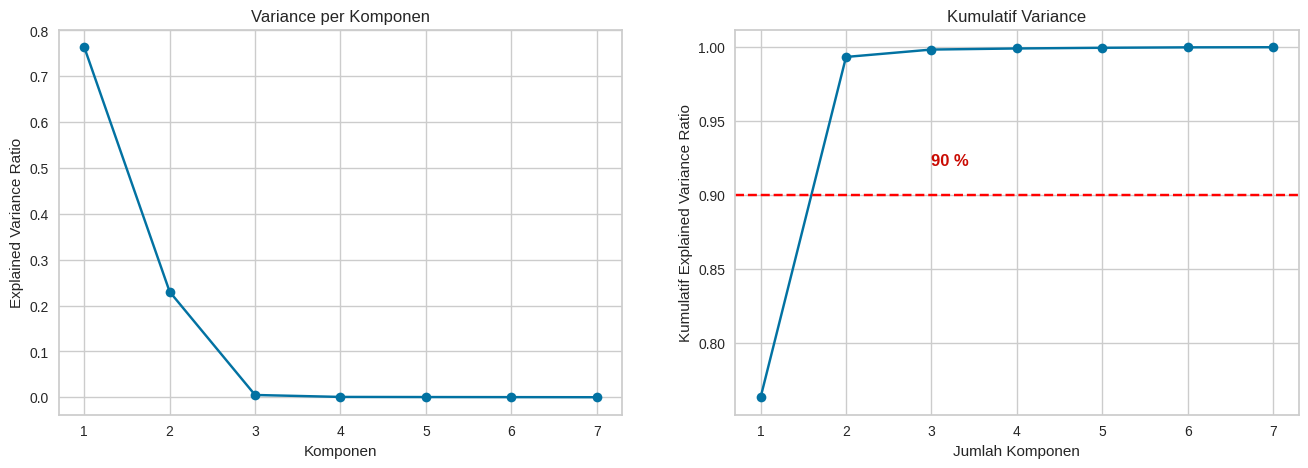

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot per komponen
ax1.plot(range(1, len(explained_var)+1), explained_var, marker='o')
ax1.set_xlabel('Komponen')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Variance per Komponen')

# Plot kumulatif
ax2.plot(range(1, len(cumsum_var)+1), cumsum_var, marker='o')
ax2.axhline(y=0.90, color='red', linestyle='--')
ax2.text(len(cumsum_var)//2, 0.92, '90 %', fontweight='bold', fontsize=12, color='r')
ax2.set_xlabel('Jumlah Komponen')
ax2.set_ylabel('Kumulatif Explained Variance Ratio')
ax2.set_title('Kumulatif Variance')

plt.show()

Using PCA with 2 components, which turned out to be the ideal setup.

In [ ]:
# Melakukan PCA untuk mereduksi feature
pca = PCA(n_components=2, random_state=11)
pca_components = pca.fit_transform(minmax_scaler_df)

pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-0.521767,-0.351905
1,-0.541568,0.507525
2,-0.541571,0.507541
3,-0.541942,0.504819
4,0.458163,0.530603


###  Elbow Method dan Silhouette Score

In [ ]:
# Menentukan cluster optimal dengan metode elbow dan silhouette score
inertia = []
silhouette = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=11)
    kmeans.fit(pca_df)

    inertia.append(kmeans.inertia_)

    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette.append(score)

### Visualisasi

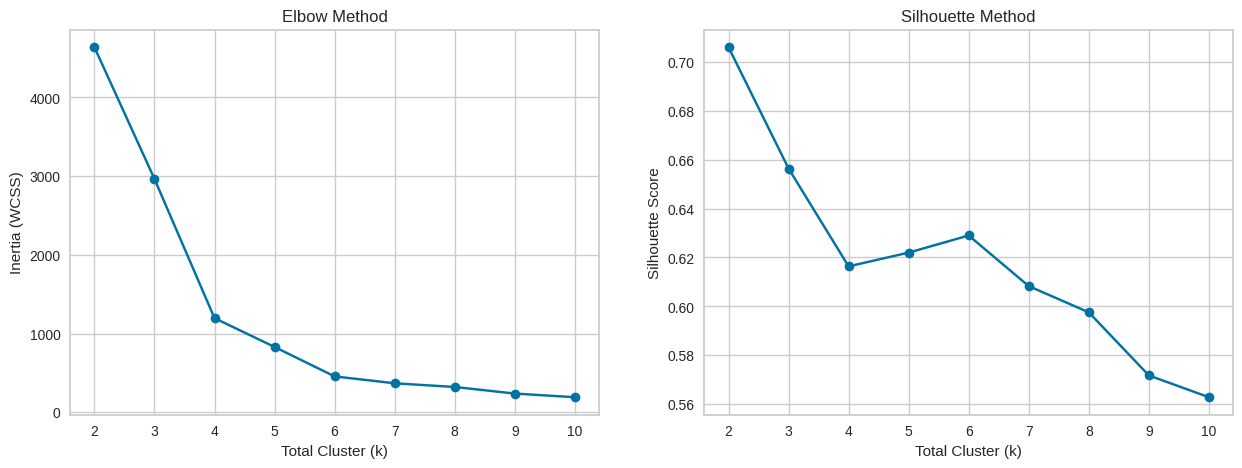

In [ ]:
plt.figure(figsize=(15,5))
# Elbow Method
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.xlabel("Total Cluster (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")

# Silhouette Score
plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o')
plt.xlabel("Total Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")

plt.show()

The Elbow Method visualization shows a sharp drop in inertia from k=2 to k=4, then begins to level off after k=4, suggesting a potential elbow point at k=4.
However, based on the Silhouette Score, the highest value is found at k=2. While this indicates good clustering performance, using only 2 clusters is considered too simplistic and less relevant for business needs.

Taking this into account, k=3 was chosen as the optimal number of clusters. It still offers a relatively high Silhouette Score and provides a more balanced segmentation making it more practical and insightful for business strategy.

# Clustering K means

In [ ]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(pca_df)

# Tambahkan label cluster ke DataFrame PCA
pca_df['Cluster'] = cluster_labels

In [ ]:
kmeans_final.cluster_centers_

array([[-0.53001454, -0.00370251],
       [ 0.47559994, -0.23300357],
       [ 0.4648319 ,  0.23188507]])

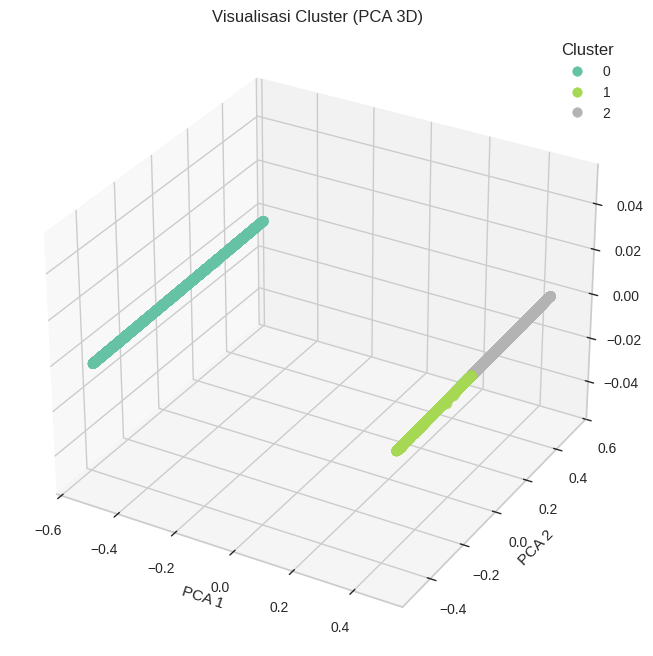

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PCA1'],
    pca_df['PCA2'],
    c=pca_df['Cluster'],
    cmap='Set2',
    s=50
)

ax.set_title("Visualisasi Cluster (PCA 3D)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

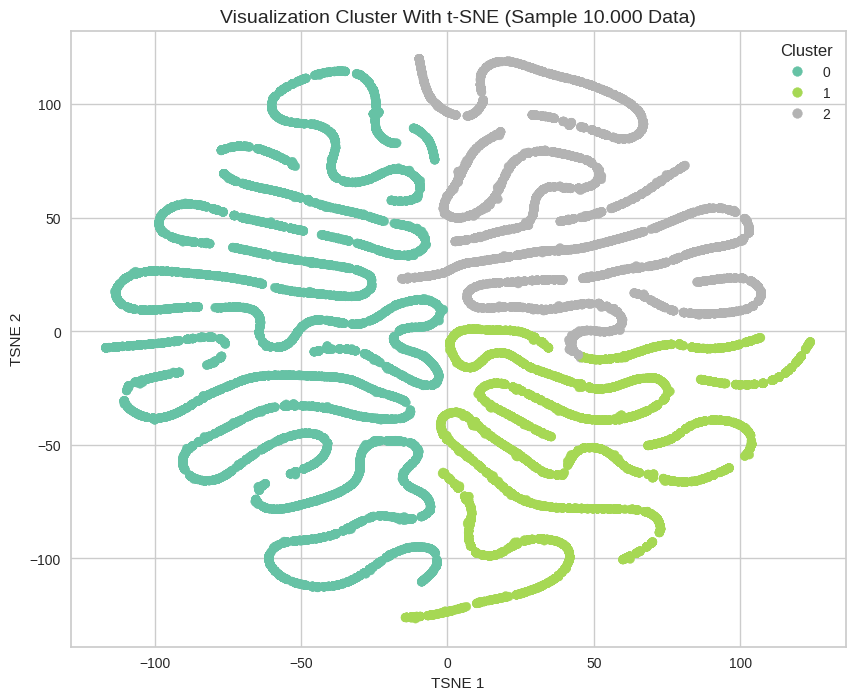

In [ ]:
sample_df = pca_df.sample(n=20000, random_state=42)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(sample_df.drop('Cluster', axis=1))

sample_df['TSNE1'] = tsne_results[:,0]
sample_df['TSNE2'] = tsne_results[:,1]

# Plot hasil t-SNE
plt.figure(figsize=(10,8))
scatter = plt.scatter(sample_df['TSNE1'],
                      sample_df['TSNE2'],
                      c=sample_df['Cluster'],
                      cmap='Set2',
                      s=40)

plt.title("Visualization Cluster With t-SNE (Sample 10.000 Data)", fontsize=14)
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


# Karakteristik Tiap Cluster

In [ ]:
clustered_df = df_segment.copy()
clustered_df['Cluster'] = cluster_labels

cluster_summary = clustered_df.groupby('Cluster').mean()
cluster_summary

,LodgingRevenue,OtherRevenue,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,req_room
Cluster,,,,,,,
0,373.843433,83.258143,1.032045,5.690683,3.016746,535.474158,0.0
1,456.365486,93.803100,1.091137,6.528418,3.269967,254.864735,1.0
2,386.727453,97.553358,1.014812,6.669952,3.152900,768.326883,1.0


The clustering results show 3 clusters with the average values of each feature:
* Budget Guest (0) → budget segment, focus on upselling & re-engagement.
* Premium Guest (1) → loyal/high-value segment, focus on loyalty programs & premium packages.
* Group Traveler (2) → group segment, focus on family/group packages + additional services

In [ ]:
cluster_mapping = {0: 'Budget Guests', 1: 'Premium Guests', 2: 'Group Travelers'}
clustered_df['Cluster'] = clustered_df['Cluster'].replace(cluster_mapping)

print(clustered_df.head())

   LodgingRevenue  OtherRevenue  BookingsCheckedIn  PersonsNights  RoomNights  \
0           371.0         105.3                  3              8           5   
1           280.0          53.0                  1             10           5   
3           240.0          60.0                  1             10           5   
5           230.0          24.0                  1              4           2   
7           535.0          94.0                  1             10           5   

   DaysSinceLastStay  req_room          Cluster  
0                151         0    Budget Guests  
1               1100         0    Budget Guests  
3               1100         0    Budget Guests  
5               1097         0    Budget Guests  
7               1100         1  Group Travelers  


In [ ]:
cluster_count = clustered_df['Cluster'].value_counts()
cluster_count

,count
Cluster,
Budget Guests,29022
Group Travelers,16743
Premium Guests,15976


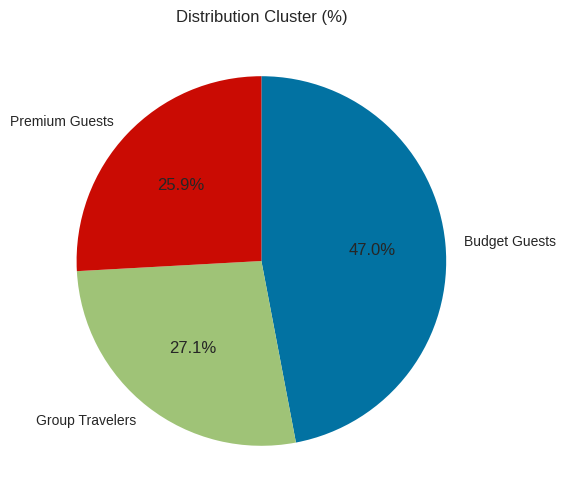

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(cluster_count,
        labels=cluster_count.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False)

plt.title("Distribution Cluster (%)")
plt.show()

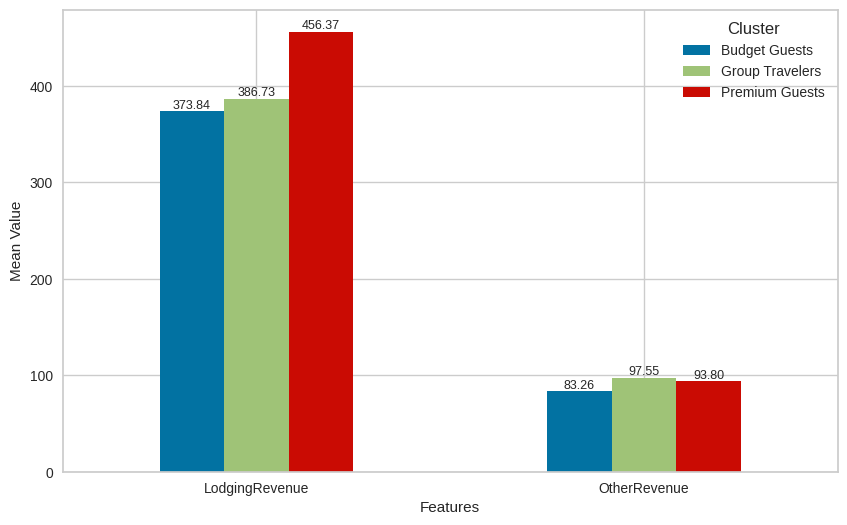

In [ ]:
spend_cols = ["LodgingRevenue", "OtherRevenue"]

spend_mean = clustered_df.groupby('Cluster')[spend_cols].mean()

ax = spend_mean.T.plot(kind='bar', figsize=(10,6))

plt.ylabel("Mean Value")
plt.xlabel("Features")
plt.legend(title="Cluster")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, rotation=0)

plt.show()

Customer Spend :
* Budget Guests :
  * Average room spending: €373
  * Average hotel service spending: €83
* Group Traveler
  * Room spending is similar to Budget Guests, averaging €387
  * Hotel service spending is higher at €97, making them the segment that uses hotel services the most
* Premium Guests :
  * Highest room spending, averaging €456
  * Hotel service spending is around €94

Business Strategy :
* Lodging Revenue:
  * Focus on Premium Guests by offering bundled packages that include breakfast and airport transportation.
  * Introduce a loyalty program customers earn points for each stay, which can be redeemed for future bookings.
* Other Revenue:
  * Since service usage is relatively similar across all clusters, target all customers to maximize hotel service revenue.
  * Offer discounts on services like breakfast, lunch or laundry.


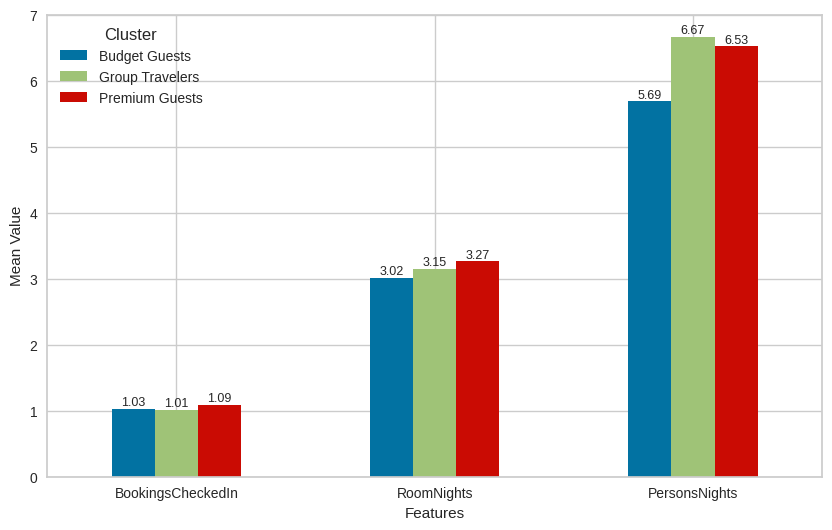

In [ ]:
freq_cols = ["BookingsCheckedIn", "RoomNights",'PersonsNights']

freq_mean = clustered_df.groupby('Cluster')[freq_cols].mean()

ax = freq_mean.T.plot(kind='bar', figsize=(10,6))

plt.ylabel("Mean Value")
plt.xlabel("Features")
plt.legend(title="Cluster")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, rotation=0)

plt.show()

Frequency :
* Budget Guests :
  * Low hotel check-in frequency: 1.03 times on average
  * Lowest average rooms booked per stay: 3.02 rooms
  * Smallest group size: ~5.69 people
* Group Traveler :
  * Low check-in frequency: 1.01 times
  * Slightly higher average rooms booked: 3.15 rooms
  * Highest average group size: ~6.67 people
* Premium Guests :
  * Highest check-in frequency: 1.09 times
  * Average rooms booked per stay: 3.27 rooms
  * Group size slightly below Group Travelers: ~6.53 people


Business Strategy:
* BookingsCheckedIn - All Customer Segments:
  * Since all segments have relatively similar check-in frequencies, focus on improving recency through post-stay campaigns.
  * Send personalized messages or offers after each stay to encourage return bookings and keep customers engaged.
* Room Per Night - Premium Guests
  * Similar to Group Travelers, reward bookings of 3+ rooms with complimentary offer like breakfast or city transport
  * Offer exclusive service perks tied to their booking size to enhance loyalty and satisfaction..
* Person Per Night - Group Travelers:
  * Provide free extra beds for large groups.
  * Give a 10% discount when they book an additional room.

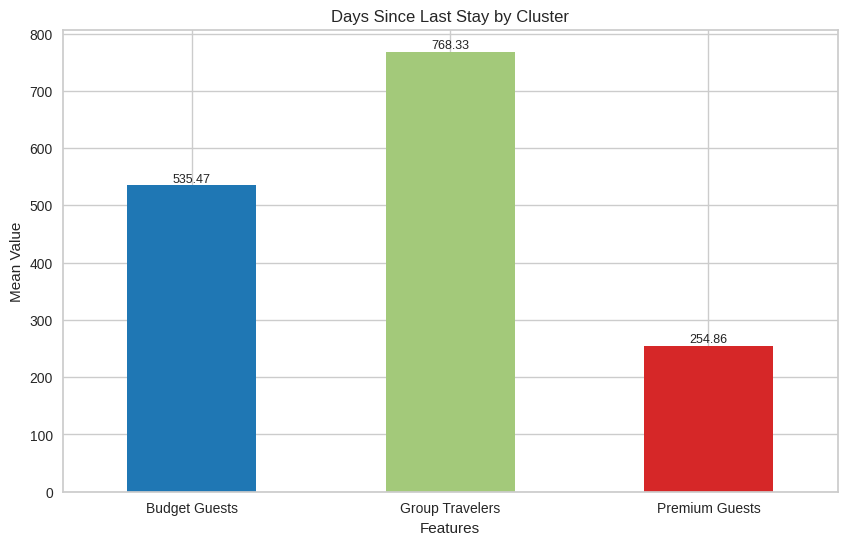

In [ ]:
recency_mean = clustered_df.groupby('Cluster')['DaysSinceLastStay'].mean()
colors = {
    'Budget Guests': '#1f77b4',
    'Group Travelers': '#A3C97A',
    'Premium Guests': '#d62728'
}

ax = recency_mean.plot(
    kind='bar',
    figsize=(10,6),
    color=[colors[label] for label in recency_mean.index])

plt.ylabel("Mean Value")
plt.xlabel("Features")
plt.title("Days Since Last Stay by Cluster")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=9, rotation=0)
plt.show()


Recency Insight :
* Budget Guests :
  * Customers last stayed around 17 months ago on average, suggesting they likely only stayed once in the past 2 years.
* Group Treveler :
  * Average last stay was around 25 months ago, indicating that these customers are less loyal or have stopped coming altogethe
* Premium Guests :
  * Customers last stayed about 7–8 months ago, suggesting they return annually, possibly during vacation or holiday seasons.

Business Strategy :
* Premium Guests :
  * Offer a discount on the next stay to increase visit frequency.
  * Promote a loyalty program with point rewards or free room upgrades to keep them coming back..
* Budget Guests dan Group Travelers:
  * Run re-engagement campaigns via email, SMS, or social media with special offers to bring them back.
  * Focus on improving service quality to build trust and encourage repeat bookings

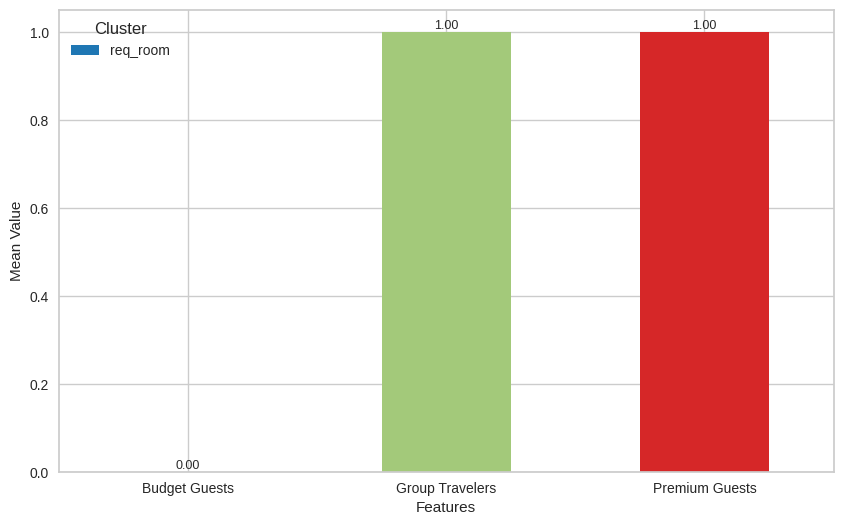

In [ ]:
req_mean = clustered_df.groupby('Cluster')['req_room'].mean()
colors = {
    'Budget Guests': '#1f77b4',
    'Group Travelers': '#A3C97A',
    'Premium Guests': '#d62728'
}

ax = req_mean.plot(
    kind='bar',
    figsize=(10,6),
    color=[colors[label] for label in recency_mean.index])

plt.ylabel("Mean Value")
plt.xlabel("Features")
plt.legend(title="Cluster")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, rotation=0)

plt.show()

Insight  :
* Group Traveler dan Premium Guests:
  * Both clusters show a clear concern for personal comfort and tend to have higher expectations for hotel services. Their frequent room requests indicate a desire for customized experiences.
* Budget Guests :
  * This cluster rarely makes special room requests, suggesting they primarily use the hotel just for resting, without needing specific services or customizations.

Strategi Bisnis :
* Group Travelers dan Premium Guests :
  * Offer a Premium Upgrade Program that includes early check-in or late check-out.
  * Allow customers to request personalized room preferences, ensuring a more tailored and satisfying experience.
* Budget Guest :
  * Attract this segment with discounted rates or affordable pricing to stay competitive.
  * Encourage guests to leave feedback to better understand their expectations and improve the overall stay experience.

In [ ]:
clustered_df["Cluster"].value_counts()

,count
Cluster,
Budget Guests,29022
Group Travelers,16743
Premium Guests,15976


* Premium Guests
  * High spenders, frequent travelers, loyal, often make special room requests.
  * Bundle Premium Packages (Room + Breakfast + Transport)
  * Reward Loyalty with exclusive offers and discounts
  * Offer early check-in / late check-out as value-adds
  * Give them personalized upgrades based on preferences


* Group Travelers
  * Families or travel groups, higher spend on hotel services, come less often but with more people.
  * Create Family / Group Deals (free kids meals, extra bed discounts, room bundle offers)
  * Run “Welcome Back” campaigns via email, SMS, or social media
  * Offer optional room upgrades for comfort and convenience



* Budget Guests
  * Solo or duo travelers, low spending, infrequent stays, rarely request extras
  * Offer low-cost upsells: breakfast, late checkout, early check-in
  * Reconnect with “We Miss You” promotions
  * Keep pricing competitive and attractive